In [1]:
##### part2 #####


###### 1 ######


#libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from math import*
from pylab import *

data2 = pd.read_csv("data6_2.csv")

### fonction 
def split(x):
    compt=0
    a,b=(len(x)*3)//4,len(x)//4
    training=np.zeros(a)
    testing=np.zeros(b)
    tr=0
    te=0
    while(compt<len(x)):
        if(compt%4==0):
            testing[te]=x[compt]
            te+=1
        else:
            training[tr]=x[compt]
            tr+=1
        compt+=1
    return training,testing



#splitting the data
    
x_training,x_testing=split(data2.x)
y_training,y_testing=split(data2.y)

#features
#we have two features x,y
print("The number of features is",len(list(data2)))
print(data2.keys())


#training examples
print("\nTraining examples :")
print(len(x_training))

#testing examples
print("\nTesting examples :")
print(len(x_testing))

#mean/median/min/max for each feature
print(data2.describe())


#represent the training data
x_ = x_training
y_ = y_training


### normalizing data ###



def normalize_x(x):
    X = np.zeros(len(x))
    for i in range (len(x)):
        X[i] = (x[i] - np.mean(x_))/ (sqrt(np.var(x_)))
    return X


def normalize_y(x):
    X = np.zeros(len(x))
    for i in range (len(x)):
        X[i] = (x[i] - np.mean(y_))/ (sqrt(np.var(y_)))
    return X

#print(data2.x)

n = len(x_training)
#normalization
x_testing_n=normalize_x(x_testing)
y_testing_n=normalize_y(y_testing)

The number of features is 2
Index(['x', 'y'], dtype='object')

Training examples :
180

Testing examples :
60
                x             y
count  240.000000    240.000000
mean    -0.100000    252.160370
std     13.885244   5609.203913
min    -24.000000 -14374.866637
25%    -12.050000  -2560.994715
50%     -0.100000    210.516519
75%     11.850000   3006.448419
max     23.800000  15268.051978


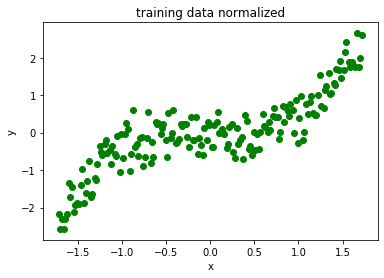

In [2]:
###### 2 ######

## parameters##
x_training_n=normalize_x(x_)
y_training_n=normalize_y(y_)
plt.scatter(x_training_n, y_training_n ,c = 'g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("training data normalized")
plt.show()


In [3]:
###### 3 ######

import numpy
#### hypothesis function ###
def reg_function_pol(w,x):
    result=np.zeros(len(x))
    for j in range(0,len(w)):
        result += w[j]*(x**j) 
    return result

### empirical error ###


def empirical_error_pol(x,y,w):
    return sum((reg_function_pol(w,x)-y)**2)/n


def generalization_error_pol(Yhat,y):
    s=0
    for i in range(len(y)):
        s = s + (1/len(y))*(pow((Yhat[i]-y[i]),2))
    return s
     


### cost function ###
def cost_(x,y,w):
    return sum((reg_function_pol(w,x)-y)**2)/2*n


### gradient ###    
        
def gradient_descent_pol(x,y,rate,precision,k):
    w=np.ones((k+1))
    d=np.ones((k+1))
    for i in range(0,k+1):
        d[i]=sum((x**i)*(reg_function_pol(w,x)-y))/n
    while(np.linalg.norm(d)>=precision):
        #print(np.linalg.norm(d))
        for i in range(0,k+1):
            w[i]-= rate*d[i]
            d[i] = sum((x**i)*(reg_function_pol(w,x)-y))/n
        #print(w-(rate*d))
        
    return w  




def difference(result,y):
    diff = np.zeros(len(result))
    diff = result - y
    return diff
            
def multiplication(x,diff,puiss):
    multip = np.zeros(len(x))
    for i in range(len(x)):
        multip[i] = pow(x[i],puiss)*diff[i]
    return multip




def gradient_descent_pol_iter(x,y,rate,precision,k):
    w=np.ones((k+1))
    d=np.ones((k+1))
    for i in range(0,k+1):
        d[i]=sum((x**i)*(reg_function_pol(w,x)-y))/n
    itera=0
    while(itera<500):
        for i in range(0,k+1):
            w[i]-= rate*d[i]
            d[i] = sum((x**i)*(reg_function_pol(w,x)-y))/n
        itera+=1
    return w       

### accuracy function

def rsquared(rate,k):
    Y_predi = np.zeros(len(y_training_n))
    w = gradient_descent_pol(x_training_n,y_training_n,rate,0.001,k)
    Y_predi = reg_function_pol(w,x_training_n)
    mse = sum((y_training_n-Y_predi)**2)
    mae = sum((y_training_n-np.mean(y_training_n))**2)
    return 1 - (1/len(y_training_n))*(mse/mae)

def rsquared_test(rate,k):
    Y_predi = np.zeros(len(y_testing_n))
    w = gradient_descent_pol(x_training_n,y_training_n,rate,0.001,k)
    Y_predi = reg_function_pol(w,x_testing_n)
    mse = sum((y_testing_n-Y_predi)**2)
    mae = sum((y_testing_n-np.mean(y_training_n))**2)
    return 1 - (1/len(y_testing_n))*(mse/mae)


def plot_pol(k,kind):
    if(kind=="metric"):
        print("parameters for k=",k,":",gradient_descent_pol(x_training_n,y_training_n,0.01,0.001,k))
        px = np.linspace(-1.7, 1.7, 1000)
        py = reg_function_pol(gradient_descent_pol(x_training_n,y_training_n,0.01,0.001,k),np.array(px))
        print("accuracy:",rsquared(0.01,k))
    elif(kind=="iteration"):
        print("parameters for k=",k,":",gradient_descent_pol_iter(x_training_n,y_training_n,0.01,0.001,k))
        px = np.linspace(-1.7, 1.7, 1000)
        py = reg_function_pol(gradient_descent_pol_iter(x_training_n,y_training_n,0.01,0.001,k),np.array(px))
    else:
        print("invalid input :)")
    plt.scatter(x_training_n, y_training_n ,c = 'blue')
    plt.plot(px,py,c='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


#### the suitable k for our data is k=3, because the data has 2 Inflection points (cause the cross validation says so )

w = gradient_descent_pol(x_training_n,x_training_n,0.01,0.001,3)


parameters for k= 3 : [-0.02282562 -0.07637362  0.02282651  0.51037325]
accuracy: 0.9992815957512716


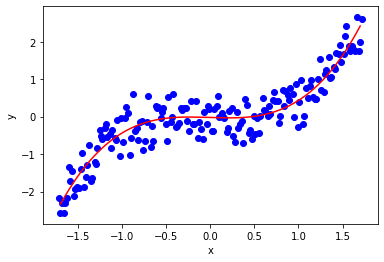

the emperical error value: 0.3151542090965658


In [4]:
###### 4 ######
plot_pol(3,"metric")
print("the emperical error value:",empirical_error_pol(x_training_n,y_training_n,w))

parameters for k= 2 : [-0.02025236  0.84122067  0.02108582]
accuracy: 0.9983781424044079


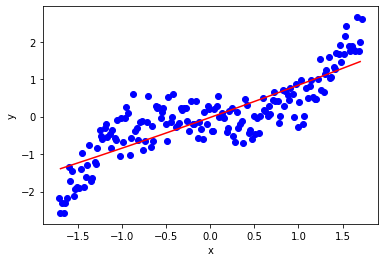

parameters for k= 3 : [-0.02282562 -0.07637362  0.02282651  0.51037325]
accuracy: 0.9992815957512716


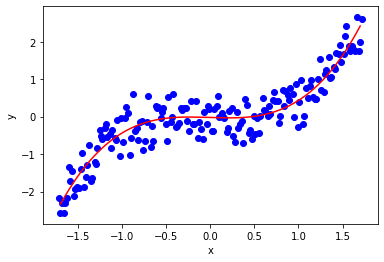

parameters for k= 5 : [-0.0758984  -0.12072329  0.19984819  0.57831675 -0.06887355 -0.02029778]
accuracy: 0.9992957005156662


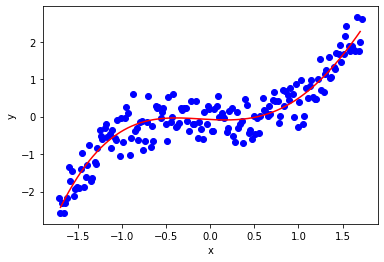

parameters for k= 7 : [-0.07177049 -0.04560441  0.17781357  0.33055415 -0.0497603   0.17174442
 -0.00426808 -0.04108506]
accuracy: 0.9992976900252407


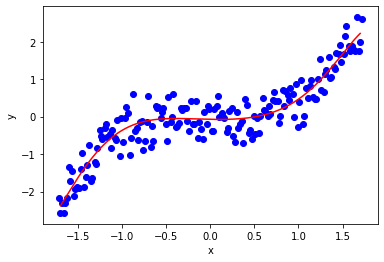

In [5]:
###### 5 ######

### k=2

plot_pol(2,"metric")



###k=3

plot_pol(3,"metric")

### k=5
plot_pol(5,"metric")




### k=7
plot_pol(7,"metric")




In [6]:
###### 6 ######

sqrt(np.var(reg_function_pol(w,x_training_n)))

0.999096010444686

In [7]:
###### 7 ######

empirical_error_pol(x_training_n,y_training_n,w)

0.3151542090965658

[-0.02282562 -0.07637362  0.02282651  0.51037325]


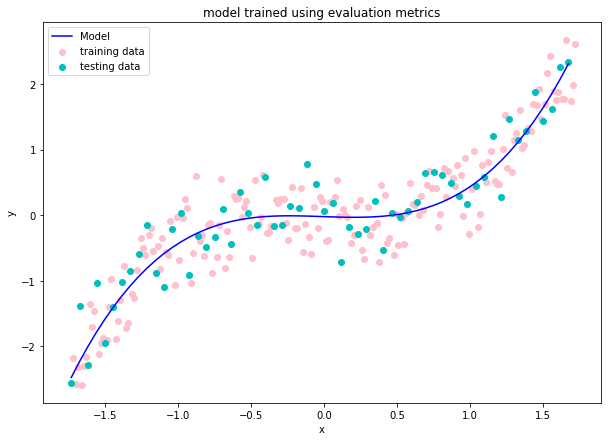

In [8]:
###### 8 ######

w = gradient_descent_pol(x_training_n,y_training_n,0.01,0.001,3)
print(w)
#represent the training data
x_test = x_training
y_test = y_training
x_test = x_testing
y_test = y_testing
## parameters##
x_test_n = normalize_x(x_test)
y_test_n = normalize_y(y_test)
fig = plt.figure(2, figsize=(10, 7))
plt.scatter(x_training_n, y_training_n ,c = 'pink',label="training data")
plt.scatter(x_test_n, y_test_n ,c = 'c',label="testing data")
plt.plot(x_test_n, reg_function_pol(w,x_test_n) ,c = 'b',linestyle="-", label="Model")
legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title("model trained using evaluation metrics")
plt.show()




In [9]:
###### 9 ######

### generalization error
generalization_error_pol(reg_function_pol(w,x_test_n),x_test_n)

0.1857607281013839

[ 0.02491243  0.27009084 -0.00946039  0.34300722]


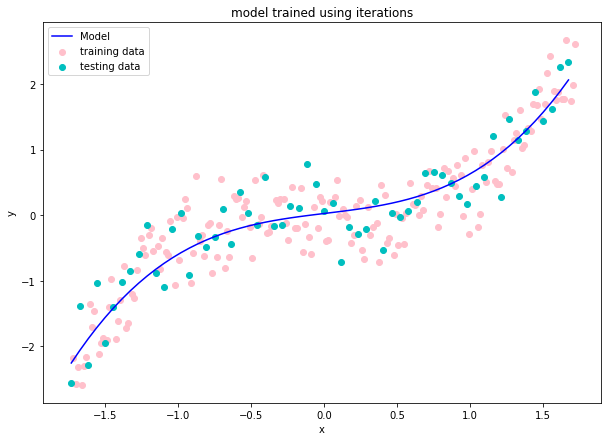

0.08603933749136705

In [10]:
###### 10 ######

### the model using iterations
w = gradient_descent_pol_iter(x_training_n,y_training_n,0.01,0.001,3)
print(w)

#represent the training data
x_test = x_training
y_test = y_training
x_test = x_testing
y_test = y_testing
## parameters##

x_test_n = normalize_x(x_test)
y_test_n = normalize_y(y_test)
fig = plt.figure(2, figsize=(10, 7))
plt.scatter(x_training_n, y_training_n ,c = 'pink',label="training data")
plt.scatter(x_test_n, y_test_n ,c = 'c',label="testing data")
plt.plot(x_test_n, reg_function_pol(w,x_test_n) ,c = 'b',linestyle="-", label="Model")
legend(loc = 'upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.title("model trained using iterations")
plt.show()



"""la methode metrique est plus precise"""
### generalization error
generalization_error_pol(reg_function_pol(w,x_test_n),x_test_n)

#
Question 1:
1:
###### 1 ######

2:
###### 2 ######

3:
It's supervised learning because we have have the input variable (x) and the output variable (Y) and we use the regression algorithm to learn the mapping function from the input to the output.

4:
Mean Squared Error(MSE)
Root-Mean-Squared-Error(RMSE)
Mean-Absolute-Error(MAE)
R² ou Coefficient de détermination

#

Question 2:
###### 3 ######
#
Question 3:
the scatter of our data shows that we're needing a model with at least 3 minimum. So the suitable K will be >3
we can know exactly wich value of K is the most suitable by comparing the RMSE of each case.
#

Question 4 and Question 5:
###### 4 ######

#
Question 6:
###### 8 ######
###### 9 ######
#
Question 8:
###### 5 ######
#
Question 9 and Question 10:
###### 10 ######